Import necessary libraries for Data Transformation, cleaning, Manipulation and Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import Raw Data
crop_data = pd.read_excel(r'd:\workpads\project 3 - Dataset\Cleaned files\FAOSTAT_Data.xlsx')

In [11]:
# Copy of the original data
df = crop_data.copy()
display(df.head())
df.shape

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


(224647, 15)

Data Transofrming

In [13]:
# Pick Crop related element (Area harvested,Yield,Production)
df = df.loc[df['Element'].isin(['Area harvested','Yield','Production'])]


Drop invalid data and unnecessary columns

In [14]:
display(df['Flag Description'].unique())

# we have to analyze 'Missing value (data cannot exist, not applicable)' 
df[df['Flag Description']=='Missing value (data cannot exist, not applicable)']
# A missing value that is described as "data cannot exist" or "not applicable" typically indicates that the value is inherently irrelevant or meaningless in the given context
df.drop(df.loc[df['Flag Description']=='Missing value (data cannot exist, not applicable)'].index,inplace=True,axis=0)

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations', nan,
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [15]:
# Calculate the Null percentage of the  'Note' column
null_percentage = (df['Note'].isna().sum()/len(df)*100)
display(null_percentage )
# We see that the 'note' column has more than 90% of missing data, which does not provide any insight, so we will drop this column.
df.drop(columns=['Note'],inplace=True,axis=1)

np.float64(97.26022160695075)

In [16]:
# Remove unesscary columns
df.drop(columns=['Domain Code','Area Code (M49)','Element Code','Item Code (CPC)','Year Code','Unit','Flag','Flag Description'],inplace=True,axis=1)


In [18]:
# Change the position of features for better understanding
new_df = df[['Domain','Area','Item','Year','Element','Value']]
new_df.head()

,Domain,Area,Item,Year,Element,Value
0,Crops and livestock products,Afghanistan,"Almonds, in shell",2019,Area harvested,29203.0
1,Crops and livestock products,Afghanistan,"Almonds, in shell",2019,Yield,1308.3
2,Crops and livestock products,Afghanistan,"Almonds, in shell",2019,Production,38205.0
3,Crops and livestock products,Afghanistan,"Almonds, in shell",2020,Area harvested,22134.0
4,Crops and livestock products,Afghanistan,"Almonds, in shell",2020,Yield,1775.9


In [19]:
# Use a pivot table for data transformation 

pivot = new_df.pivot_table(index=['Domain','Area','Item','Year'],columns='Element',values='Value').reset_index()

# Set the correct unit of measurement for the columns
# 1 hectare = 10,000 square meters = 2.471 acres.
pivot['Area_unit'] = 'Ha'
pivot['Production_unit'] = 'Ton'
pivot['Yield_unit'] = 'kg'

# Drop duplicates if the dataset contains any
pivot.drop_duplicates(inplace=True)

# Align the features in the correct position
crop_data = pivot[['Domain','Area','Item','Year','Area harvested','Area_unit','Yield','Yield_unit','Production','Production_unit']]

# Save the data for safety purposes
crop_data.to_csv('crop_transformed.csv',index=False)
print('The data has been saved')

The data has been saved


Data cleaning

In [20]:
# A copy of the transformed data for further processing 
df = crop_data.copy()
df.head()

Element,Domain,Area,Item,Year,Area harvested,Area_unit,Yield,Yield_unit,Production,Production_unit
0,Crops and livestock products,Afghanistan,"Almonds, in shell",2019,29203.0,Ha,1308.3,kg,38205.0,Ton
1,Crops and livestock products,Afghanistan,"Almonds, in shell",2020,22134.0,Ha,1775.9,kg,39307.0,Ton
2,Crops and livestock products,Afghanistan,"Almonds, in shell",2021,36862.0,Ha,1743.2,kg,64256.0,Ton
3,Crops and livestock products,Afghanistan,"Almonds, in shell",2022,36462.0,Ha,1742.0,kg,63515.0,Ton
4,Crops and livestock products,Afghanistan,"Almonds, in shell",2023,37000.0,Ha,1810.8,kg,67000.0,Ton


In [29]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82126 entries, 0 to 82125
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain           82126 non-null  object 
 1   Area             82126 non-null  object 
 2   Item             82126 non-null  object 
 3   Year             82126 non-null  int64  
 4   Area harvested   47901 non-null  float64
 5   Area_unit        82126 non-null  object 
 6   Yield            50573 non-null  float64
 7   Yield_unit       82126 non-null  object 
 8   Production       81944 non-null  float64
 9   Production_unit  82126 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.3+ MB


In [ ]:
# remove items that are not related to the crops 

uncrop_items = ['Butter and ghee of sheep milk','Butter of cow milk','Cattle fat, unrendered','Cheese from milk of goats, fresh or processed','Cheese from milk of sheep, fresh or processed','Edible offal of cattle, fresh, chilled or frozen','Edible offal of goat, fresh, chilled or frozen','Edible offal of sheep, fresh, chilled or frozen','Edible offals of camels and other camelids, fresh, chilled or frozen','Fat of camels','Game meat, fresh, chilled or frozen','Goat fat, unrendered','Hen eggs in shell, fresh','Meat of camels, fresh or chilled','Meat of chickens, fresh or chilled','Meat of goat, fresh or chilled','Meat of sheep, fresh or chilled','Natural honey','Raw hides and skins of cattle','Raw hides and skins of goats or kids','Raw hides and skins of sheep or lambs','Raw milk of camel','Raw milk of cattle','Raw milk of goats','Raw milk of sheep','Raw silk (not thrown)','Sheep fat, unrendered','Shorn wool, greasy, including fleece-washed shorn wool','Silk-worm cocoons suitable for reeling','Skim milk of cows','Cheese from whole cow milk','Edible offal of pigs, fresh, chilled or frozen','Eggs from other birds in shell, fresh, n.e.c.','Fat of pigs','Meat of pig with the bone, fresh or chilled','Meat of turkeys, fresh or chilled','Oats','Other meat of mammals, fresh or chilled','Raw milk of buffalo','Vetches','Wine','Unmanufactured tobacco','Cheese from skimmed cow milk','Edible offals of horses and other equines,  fresh, chilled or frozen','Horse meat, fresh or chilled','Meat of rabbits and hares, fresh or chilled','Beeswax','Pig fat, rendered','Cream, fresh','Ghee from cow milk','Meat of asses, fresh or chilled','Meat of ducks, fresh or chilled','Meat of geese, fresh or chilled','Meat of mules, fresh or chilled','Skim milk and whey powder','Tallow','Whey','Whole milk powder','Whole milk, condensed','Whole milk, evaporated','Cheese from milk of buffalo, fresh or processed','Skim milk, condensed','Whey, condensed','Yoghurt','Buffalo fat, unrendered','Butter of buffalo milk','Edible offal of buffalo, fresh, chilled or frozen','Ghee from buffalo milk','Meat of buffalo, fresh or chilled','Raw hides and skins of buffaloes','Meat of other domestic camelids, fresh or chilled','Meat of other domestic rodents, fresh or chilled','Skim milk, evaporated','Meat of pigeons and other birds n.e.c., fresh, chilled or frozen','Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails','Buttermilk, dry','Meat of cattle with the bone, fresh or chilled','Molasses','Sunflower-seed oil, crude','Green tea (not fermented), black tea (fermented) and partly fermented tea, in immediate packings of a content not exceeding 3 kg','Groundnut oil','Soya bean oil','Margarine and shortening','Palm oil','Oil of maize','Whey, dry','Mixed grain','Coconut oil']
df.drop(df[df['Item'].isin(uncrop_items)].index,inplace=True)

In [22]:
df['Item'].unique().tolist()

# Change the Items name for better understading 

df['Item'] = df['Item'].replace({'Almonds, in shell':'Almond',
           'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw':'Anise',
           'Cantaloupes and other melons':'Muskmelon',
           'Cotton lint, ginned':'cotton plants',
           'Cotton seed':'cotton plants',
           'Cottonseed oil':'cotton plants',
           'Linseed':'Flax',
           'Maize (corn)':'corn',
           'Oil of linseed':'Flax',
           'Oil of sesame seed':'sesame seeds',
           'Olive oil':'Olives',
           'Onions and shallots, dry (excluding dehydrated)':'Onions',
           'Oranges':'Oranges',
           'Other berries and fruits of the genus vaccinium n.e.c.':'Berries',
           'Other citrus fruit, n.e.c.':'citrus',
           'Other fruits, n.e.c.':'citrus',
           'Other nuts (excluding wild edible nuts and groundnuts), in shell, n.e.c.':'nuts',
           'Other pulses n.e.c.':'Pulses ',
           'Other stimulant, spice and aromatic crops, n.e.c.':'Aromatic crops',
           'Other stone fruits':'Stone fruits',
           'Other vegetables, fresh n.e.c.':'fresh vegetables',
           'Peaches and nectarines':'Peaches',
           'Pistachios, in shell':'Pista',
           'Plums and sloes':'Plums',
           'Raw cane or beet sugar (centrifugal only)':'sugar beet',
           'Seed cotton, unginned':'cotton plants',
           'Walnuts, in shell':'walnut',
           'Beans, dry':'Beans',
           'Beer of barley, malted':'barley',
           'Broad beans and horse beans, dry':'Broad beans',
           'Broad beans and horse beans, green':'Broad beans',
           'Carrots and turnips':'Carrot',
           'Cauliflowers and broccoli':'Cauliflowers',
           'Chestnuts, in shell':'chestnut',
           'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)':'Chili pepper',
           'Cucumbers and gherkins':'Cucumbers',
           'Eggplants (aubergines)':'Eggplants',
           'Green garlic':'garlic',
           'Leeks and other alliaceous vegetables':'Leeks',
           'Lemons and limes':'Lemons',
           'Lettuce and chicory':'Lettuce',
           'Mushrooms and truffles':'Mushrooms',
           'Okra':'ladys fingers',
           'Onions and shallots, green':'Onions',
           'Other beans, green':'beans',
           'Peas, green':'Peas',
           'Pumpkins, squash and gourds':'Pumpkins',
           'Sour cherries':'cherries',
           'Tangerines, mandarins, clementines':'Oranges',
           'Chick peas, dry':'Chick peas',
           'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw':'Chili pepper',
           'Groundnuts, excluding shelled':'Peanuts',
           'Lentils, dry':'Lentils',
           'Locust beans (carobs)':'Locust beans',
           'Peas, dry':'Peas',
           'Pomelos and grapefruits':'grapefruits',
           'Rape or colza seed':'colza seed',
           'Rapeseed or canola oil, crude':'colza seed',
           'Safflower-seed oil, crude':'Safflower seed',
           'Cashew nuts, in shell':'Cashew nuts',
           'Cassava, fresh':'Cassava',
           'Castor oil seeds':'Castor seeds',
           'Kenaf, and other textile bast fibres, raw or retted':'Kenaf',
           'Mangoes, guavas and mangosteens':'Mangoes',
           'Oil of palm kernel':'palm kernel',
           'Oil palm fruit':'palm kernel',
           'Sisal, raw':'Sisal',
           'Green corn (maize)':'corn',
           'Other tropical fruits':'tropical fruits',
           'Cereals n.e.c.':'Cereals',
           'Flax, raw or retted':'Flax',
           'Mat� leaves':'Mango',
           'Other fibre crops, raw, n.e.c.':'fibre',
           'Other oil seeds, n.e.c.':'oil seeds',
           'Peppermint, spearmint':'mint',
           'String beans':'beans',
           'Whey, dry':'Whey',
           'Hazelnuts, in shell':'Hazelnuts',
           'Currants':'Grape',
           'Ginger, raw':'Ginger',
           'Hempseed':'Hemp',
           'True hemp, raw or retted':'Hemp',
           'Coconuts, in shell':'Coconuts',
           'Pigeon peas, dry':'Pigeon peas',
           'Plantains and cooking bananas':'Raw banana',
           'Coir, raw':'coconut Coir',
           'Jute, raw or retted':'Jute',
           'Natural rubber in primary forms':'Rubber',
           'Other sugar crops n.e.c.':'Sugarcane',
           'Other pome fruits':'pome fruits',
           'Edible roots and tubers with high starch or inulin content, n.e.c., fresh':'Tuber',
           'Karite nuts (sheanuts)':'Vitellaria',
           'Pepper (Piper spp.), raw':'Pepper',
           'Nutmeg, mace, cardamoms, raw':'Nutmeg',
           'Brazil nuts, in shell':'Brazil nut',
           'Cow peas, dry':'Cow peas',
           'Ramie, raw or retted':'Ramie',
           'Bambara beans, dry':'Bambara beans',
           'Cinnamon and cinnamon-tree flowers, raw':'Cinnamon',
           'Cloves (whole stems), raw':'Cloves',
           'Vanilla, raw':'Vanilla',
           'Agave fibres, raw, n.e.c.':'Agave fibres',
           'Abaca, manila hemp, raw':'Abaca',
           'Pyrethrum, dried flowers':'Pyrethrum',
           'Kapok fibre, raw':'Kapok',
           'Kapok fruit':'Kapok',
           'Kapokseed in shell':'Kapok',
           'Other tropical fruits, n.e.c.':'tropical fruits'
           
           })

In [24]:
# Change the Items name for better understading

df['Area'].unique().tolist()

df['Area'] = df['Area'].replace({"Democratic People's Republic of Korea":"North Korea","Guinea-Bissau":"Guinea Bissau","Lao People's Democratic Republic":"Laos","C�te d'Ivoire":"Cote dIvoire"})


df['Area'] = df['Area'].replace({'Antigua and Barbuda':'Antigua Barbuda',
                                'Bolivia (Plurinational State of)':'Bolivia',
                                'Bosnia and Herzegovina':'Bosnia Herzegovina',
                                'China, Hong Kong SAR':'Hong Kong',
                                'China, Macao SAR':'Macao',
                                'China, Taiwan Province of':'Taiwan',
                                'China, mainland':'Mainland',
                                'Democratic Republic of the Congo':'Congo',
                                'Iran (Islamic Republic of)':'Iran',
                                'Micronesia (Federated States of)':'Micronesia',
                                'Micronesia (Federated States of)':'Micronesia',
                                'Netherlands (Kingdom of the)':'Netherlands',
                                'Republic of Korea':'South Korea',
                                'Republic of Moldova':'Moldova',
                                'Russian Federation':'Russian',
                                'Saint Kitts and Nevis':'Saint Kitts Nevis',
                                'Saint Vincent and the Grenadines':'Saint Vincent Grenadines',
                                'Syrian Arab Republic':'Syrian',
                                'Timor-Leste':'Timor Leste',
                                'Trinidad and Tobago':'Trinidad Tobago',
                                'T�rkiye':'Turkey',
                                'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                'United Republic of Tanzania':'Tanzania',
                                'United States of America':'America',
                                'Venezuela (Bolivarian Republic of)':'Venezuela',
                                })
  


In [26]:
# check null values
df.isna().sum()

Element
Domain                0
Area                  0
Item                  0
Year                  0
Area harvested     4276
Area_unit             0
Yield              7058
Yield_unit            0
Production          174
Production_unit       0
dtype: int64

In [27]:
# Most of the null values are in the 'Yield' column.so, we drop null values by yield column

df.dropna(subset=['Yield'],inplace=True)

In [28]:
# Check Null values 
df.isna().sum()

Element
Domain             0
Area               0
Item               0
Year               0
Area harvested     0
Area_unit          0
Yield              0
Yield_unit         0
Production         0
Production_unit    0
dtype: int64

In [34]:
# The columns contain 0 values. We need to analyze further

print('area harvested:',len(df[df['Area harvested']==0]))
print('Yield:',len(df[df['Yield']==0]))
print('Production:',len(df[df['Production']==0]))

# Based on the area harvested, yield, and the production measuring formula, we can find the missing value in a column when we have the other two features. For instance, production can be calculated using the formula (area harvested * yield) / 1000.
# Therefore, we will drop rows where two columns contain null values in the same row

zero_values = df[(df['Area harvested']==0)&(df['Production']==0)].index
display(zero_values)
zero_value2 = df[(df['Production']==0)&(df['Yield']==0)].index
display(zero_value2)
zero_value3 = df[(df['Area harvested']==0)&(df['Yield']==0)].index
display(zero_value3)

df.drop(index=zero_values,inplace=True)
df.drop(index=zero_value2,inplace=True)
df.drop(index=zero_value3,inplace=True)


area harvested: 138
Yield: 14
Production: 14


Index([], dtype='int64')

Index([18688, 20168, 20175, 25475, 36804, 36805, 44052, 44053, 44054, 44056,
       66391, 66625, 68703, 70574],
      dtype='int64')

Index([], dtype='int64')

In [41]:
# Now, check which columns contain 0 values
pd.set_option('display.max_rows',None)
display(df[df['Area harvested']==0])
display(df[df['Yield']==0])
display(df[df['Production']==0])

# Some values are 0, but they correspond to yield per hectare and production, indicating that the area size is below one hectare. For example, using the formula: production (tons) / yield (hectares) = area harvested.
# In this case, 11 / 26,814.3 = 0.00041022887
# So, we will drop the production values where they are 0

df.drop(df[df['Area harvested']<1].index,inplace=True)

Element,Domain,Area,Item,Year,Area harvested,Area_unit,Yield,Yield_unit,Production,Production_unit


Element,Domain,Area,Item,Year,Area harvested,Area_unit,Yield,Yield_unit,Production,Production_unit


Element,Domain,Area,Item,Year,Area harvested,Area_unit,Yield,Yield_unit,Production,Production_unit


In [37]:
# Reset the index for row continuity
df.reset_index(drop=True,inplace=True)

In [42]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43628 entries, 0 to 43627
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain           43628 non-null  object 
 1   Area             43628 non-null  object 
 2   Item             43628 non-null  object 
 3   Year             43628 non-null  int64  
 4   Area harvested   43628 non-null  float64
 5   Area_unit        43628 non-null  object 
 6   Yield            43628 non-null  float64
 7   Yield_unit       43628 non-null  object 
 8   Production       43628 non-null  float64
 9   Production_unit  43628 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.3+ MB


In [43]:
# Describe Numeric data
df.describe()

Element,Year,Area harvested,Yield,Production
count,43628.000000,4.362800e+04,43628.000000,4.362800e+04
mean,2021.004951,1.862897e+05,12867.235551,1.294756e+06
std,1.413848,1.497075e+06,26758.519664,1.327775e+07
min,2019.000000,1.000000e+00,1.300000,6.000000e-02
25%,2020.000000,4.820000e+02,1943.800000,2.289908e+03
50%,2021.000000,3.800500e+03,6152.400000,2.344632e+04
75%,2022.000000,2.702075e+04,15089.025000,1.693114e+05
max,2023.000000,4.783200e+07,705196.700000,7.825858e+08


In [45]:
# describe categorical Data
df.describe(include=['object'])

Element,Domain,Area,Item,Area_unit,Yield_unit,Production_unit
count,43628,43628,43628,43628,43628,43628
unique,1,199,143,1,1,1
top,Crops and livestock products,China,corn,Ha,kg,Ton
freq,43628,590,1060,43628,43628,43628


**Univariate analysis**

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Area harvested'}>],
       [<Axes: title={'center': 'Yield'}>,
        <Axes: title={'center': 'Production'}>]], dtype=object)

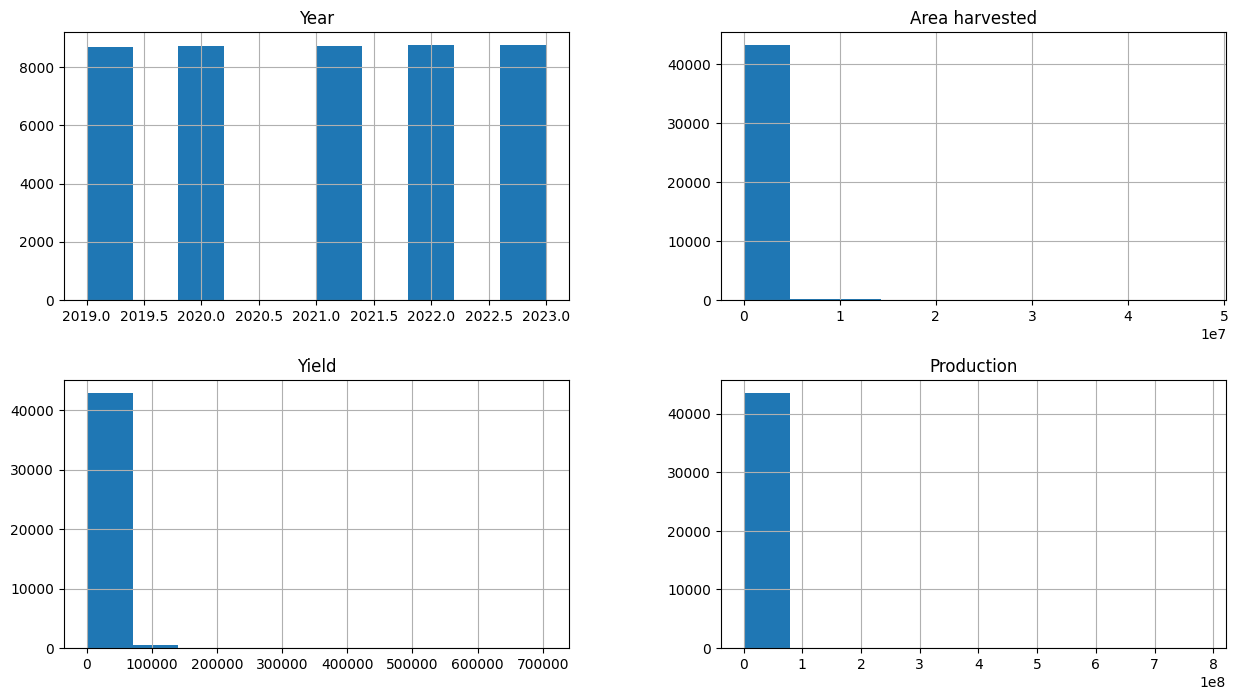

In [46]:
# distribution of the Numeric data
df[['Year','Area harvested','Yield','Production']].hist(figsize=(15,8))

# Year: Uniformly distributed across years from 2019 to 2023.Each year appears to have a similar number of data points.
# Area harvested : Highly right-skewed.Most data points cluster around 1 to 50 million, with a few outliers extending far to the right.
# Yield : Highly right-skewed.Most data points cluster around 1 to 70,000/80,000, with some outliers on the higher end.
# production: Highly right-skewed.Most data points cluster around 100 million, with some outliers extending significantly higher.

# The right-skewness and outliers suggest a possible presence of a few large farms or producers contributing significantly to the overall area harvested, yield, and production. 
# Further investigation is needed to understand the reasons behind these outlier values and their potential impact on the overall data.

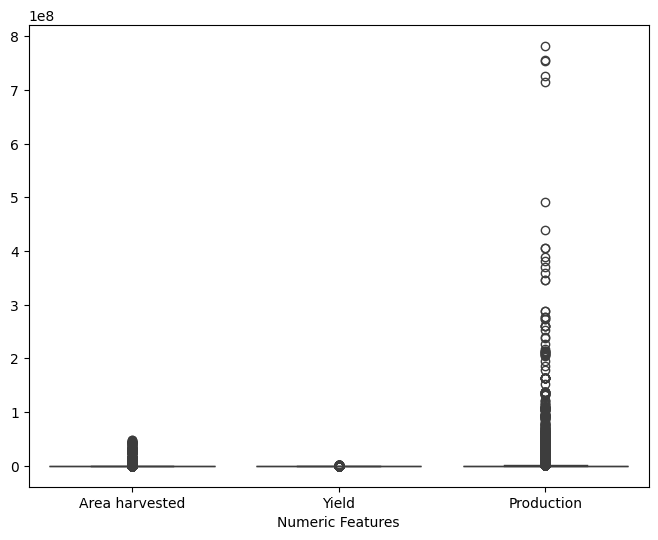

In [ ]:
# Check outliers by boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Area harvested','Yield','Production']])
plt.xlabel('Numeric Features')
plt.show()

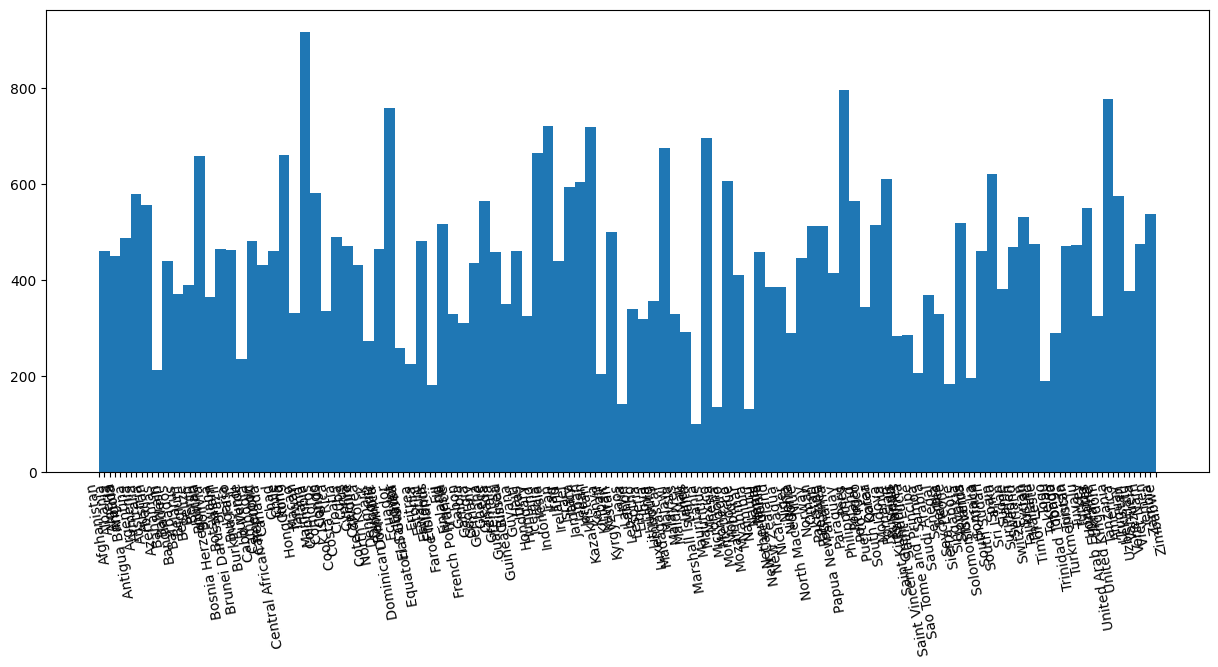

'Top Observed Area:'

Area
China       590
Mainland    575
Mexico      530
Congo       470
Peru        455
Turkey      448
Morocco     440
America     431
Kenya       413
Iran        405
Name: count, dtype: int64

In [54]:
# Area
plt.figure(figsize=(15,6))
plt.hist(df['Area'],bins=100)
plt.xticks(rotation=100)
plt.tight_layout()
plt.show()

# list out the Top frequancy Area for better understanding
display('Top Frequancy Area:',df['Area'].value_counts(ascending=False).head(10))

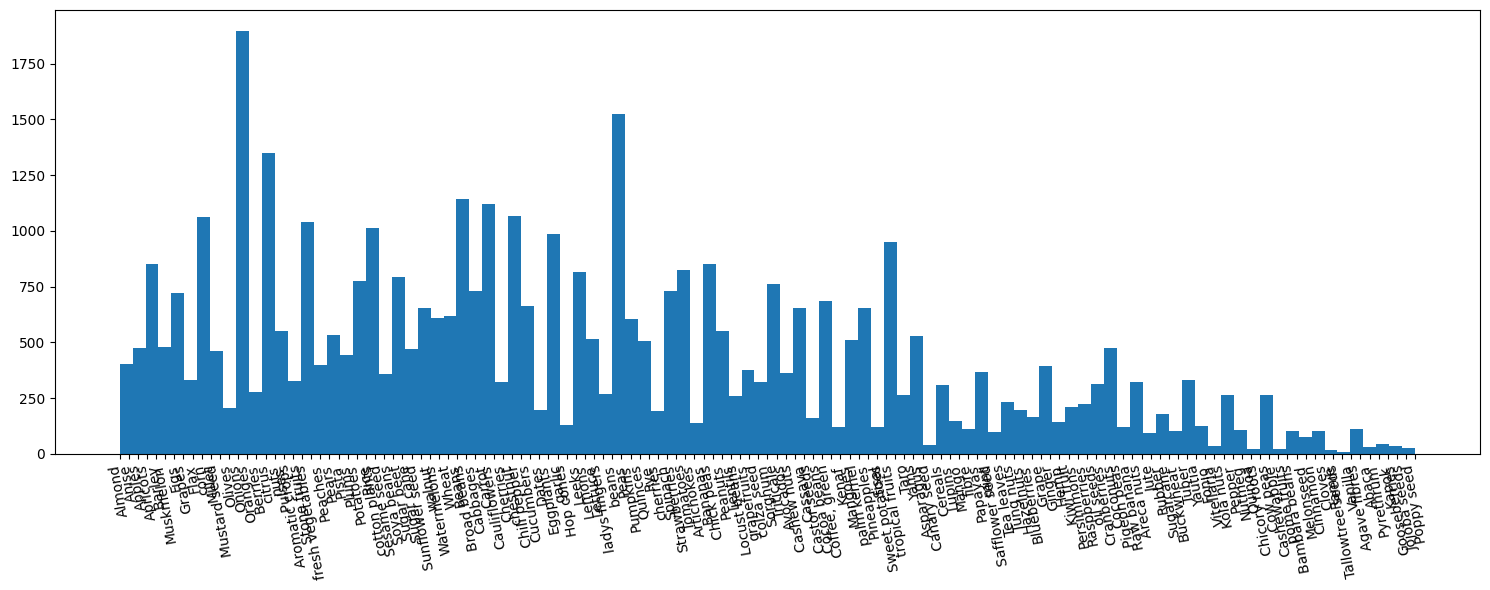

'Top Frequancy Items:'

Item
corn                1060
citrus              1014
Onions               950
Oranges              946
Chili pepper         932
fresh vegetables     901
Peas                 898
Tomatoes             823
Potatoes             776
Cabbages             732
Name: count, dtype: int64

In [80]:
# Item 
plt.figure(figsize=(15,6))
plt.hist(df['Item'],bins=100)
plt.xticks(rotation=100)
plt.tight_layout()
plt.show()

# list out the Top frequancy Items for better understanding
display('Top Frequancy Items:',df['Item'].value_counts(ascending=False).head(10))

In [56]:
# create New feature

# The "items" column has many unique values, making it difficult to analyze directly. Creating a new feature called "item_category" is a good approach to solve this.

# Assign items in the list to relevant category 
fruits = ['Apples', 'Apricots', 'Figs', 'Grapes', 'Olives', 'Oranges',
          'Berries', 'citrus', 'Peaches', 'Pears', 'Pista', 'Plums', 'Watermelons',
          'Cherries', 'chestnut', 'Dates', 'Lemons', 'Quinces', 'Strawberries',
          'Bananas', 'grapefruits', 'Avocados', 'Mangoes', 'Pineapples', 'Mango',
          'Papayas', 'Blueberries', 'Grape', 'Kiwi fruit', 'Persimmons',
          'Raspberries', 'Cranberries', 'Coconuts', 'Raw banana', 'Cashewapple',
          'Gooseberries','Muskmelon','Stone fruits','tropical fruits','pome fruits']

vegetables = ['Onions', 'Potatoes', 'Spinach', 'Tomatoes',
              'Cabbages', 'Carrot', 'Cauliflowers', 'Chili pepper', 'Cucumbers',
              'Eggplants', 'garlic', 'Leeks', 'Lettuce', 'ladys fingers', 'Peas',
              'Pumpkins', 'Asparagus', 'Artichokes', 'Sweet potatoes', 'Yams',
              'Ginger', 'Taro','fresh vegetables','Cassava','Chicory roots']

Grains_Cereals = ['Barley','Flax','corn','Millet','Rice','Wheat','Sorghum','Triticale','Canary seed','Cereals','Buckwheat','Fonio','Quinoa']

Fibers = ['cotton plants','Sisal','fibre','Jute','Ramie','Agave fibres','Abaca','Kapok']

oil = ['Mustard seed','Sesame seed','Sunflower seed','colza seed','Castor seeds','palm kernel','Safflower seed','oil seeds']

Legumes = ['Pulses','Soya beans','Beans','Broad beans','Chick peas','Peanuts','Lentils','Locust beans','Lupins','Pigeon peas','Cow peas','Bambara beans']

Spices_Aromatics = ['Anise','Aromatic crops','mint','Pepper','Nutmeg','Cinnamon','Cloves','Poppy seed']

Industrial_Crops = ['Sugr baeet','Sugar cane','Sugarcane','Tallowtree seeds']

Nuts = ['Almond','nuts','walnut','Cashew nuts','Tung nuts','Hazelnuts','Areca nuts','Kola nuts','Jojoba seeds']

Miscellaneous_Crops= ['Hop cones','Cocoa beans','Coffee','green','Tea leaves','Rubber','Tuber','Araceae','Vitellaria','Melonseed','Vanilla','Pyrethrum']


# create function 
def categorize_crop(item):
  if item in fruits:
    return 'Fruits'
  elif item in vegetables:
    return 'Vegetables'
  elif item in Grains_Cereals:
    return 'Grains Cereals'
  elif item in Fibers:
    return 'Fibers'
  elif item in oil:
    return 'Oil'
  elif item in Legumes:
    return 'Legumes'
  elif item in Spices_Aromatics:
    return 'Spices Aromatics'
  elif item in Industrial_Crops:
    return 'Industrial Crops'
  elif item in Nuts:
    return 'Nuts'
  elif item in Miscellaneous_Crops:
    return 'Miscellaneous Crops'
  else:
    return 'Miscellaneous Crops'

# Apply function on the 
df['Item Category'] = df['Item'].apply(categorize_crop)


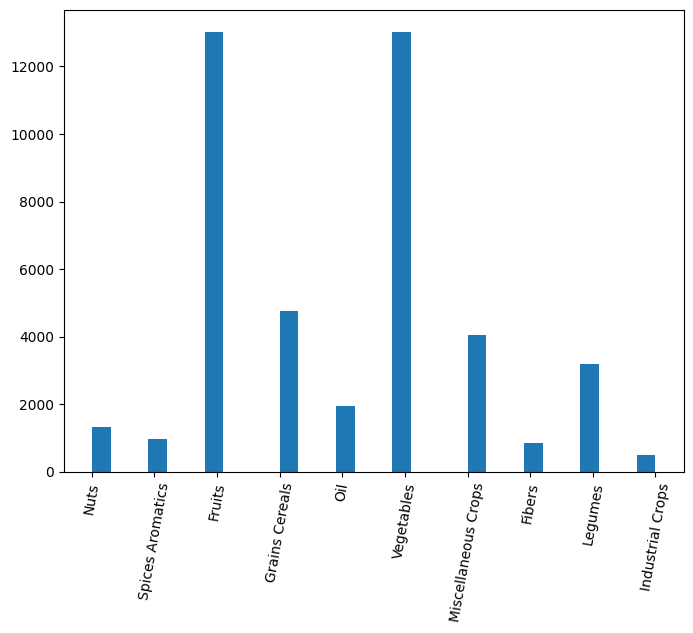

In [57]:
# Item Category

plt.figure(figsize=(8,6))
plt.hist(df['Item Category'],bins=30)
plt.xticks(rotation=80)
plt.show()

# Based on the data, the distribution appears to be imbalanced.indicating an uneven representation across categories.

EDA

In [76]:
# Crop Types: Study the distribution of the Item column to identify the most and least cultivated crops across regions.
item_distribution = df.groupby(['Area', 'Item']).size().reset_index(name='Counts')

# Find the most and least cultivated crops for each Area
most_least_crops = item_distribution.loc[item_distribution.groupby('Area')['Counts'].idxmax()].rename(columns={'Item': 'Most_Cultivated_Item'})
least_crops = item_distribution.loc[item_distribution.groupby('Area')['Counts'].idxmin()].rename(columns={'Item': 'Least_Cultivated_Item'})

# Merge the results
result = most_least_crops[['Area', 'Most_Cultivated_Item']].merge(least_crops[['Area', 'Least_Cultivated_Item']], on='Area')
result.head(10)

,Area,Most_Cultivated_Item,Least_Cultivated_Item
0,Afghanistan,citrus,Soya beans
1,Albania,Broad beans,Apples
2,Algeria,Broad beans,Almond
3,America,Oranges,Almond
4,Angola,citrus,Avocados
5,Antigua Barbuda,corn,Spinach
6,Argentina,Chili pepper,Almond
7,Armenia,Peas,Apples
8,Australia,Oranges,Eggplants
9,Austria,Broad beans,Apples


In [77]:
# Geographical Distribution: Explore the Area column to understand which regions focus on specific crops or have high agricultural activity.

geographical_distribution = df.groupby(['Area','Item'], as_index=False)['Area harvested'].sum().sort_values('Area harvested', ascending=False)
geographical_distribution

top_crops_per_region = (geographical_distribution.loc[geographical_distribution.groupby('Area')['Area harvested'].idxmax()])
top_crops_per_region.head(10)

,Area,Item,Area harvested
30,Afghanistan,Wheat,10910973.0
82,Albania,corn,282350.0
129,Algeria,Wheat,8791772.0
211,America,corn,168241181.0
247,Angola,corn,13642057.0
277,Antigua Barbuda,tropical fruits,4656.0
325,Argentina,Soya beans,79984582.0
375,Armenia,Wheat,301040.0
448,Australia,Wheat,58562209.0
501,Austria,Wheat,1414710.0


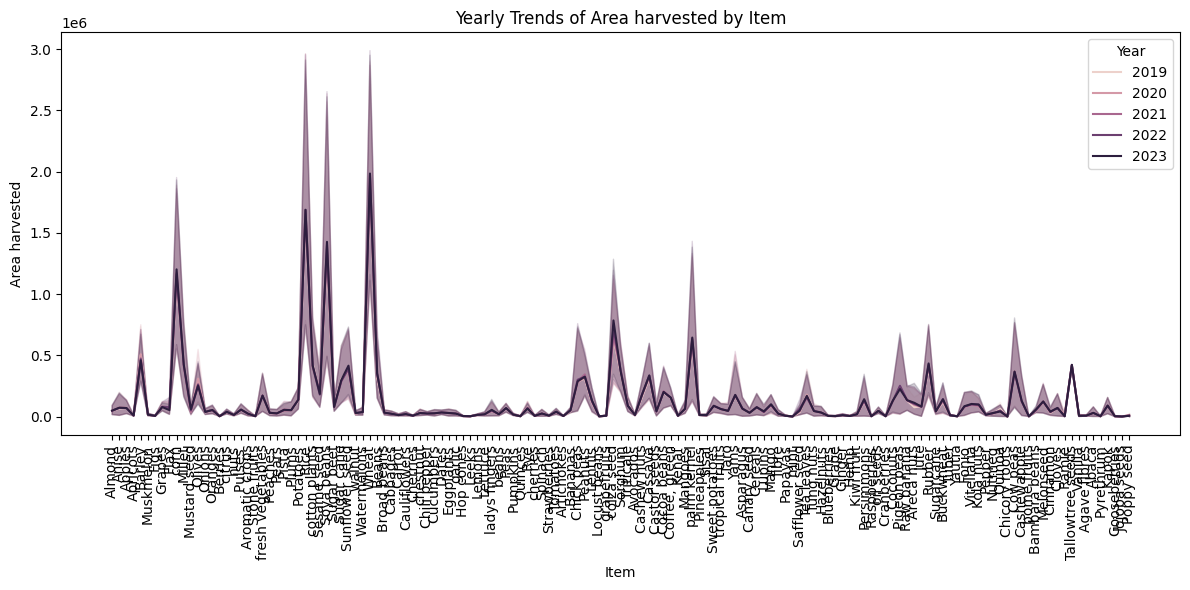

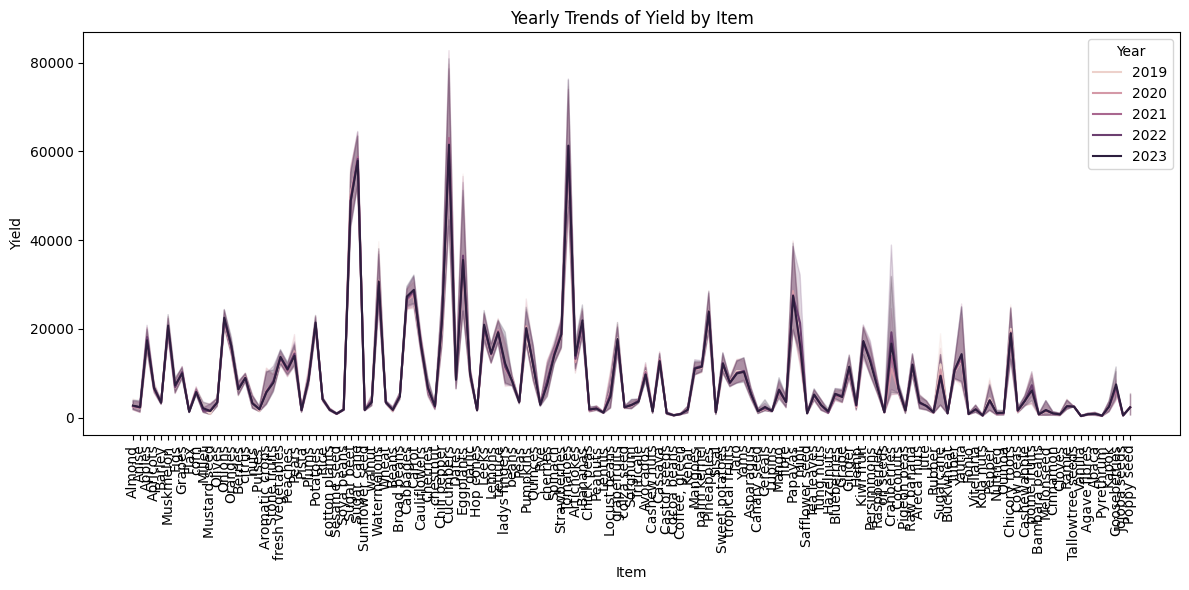

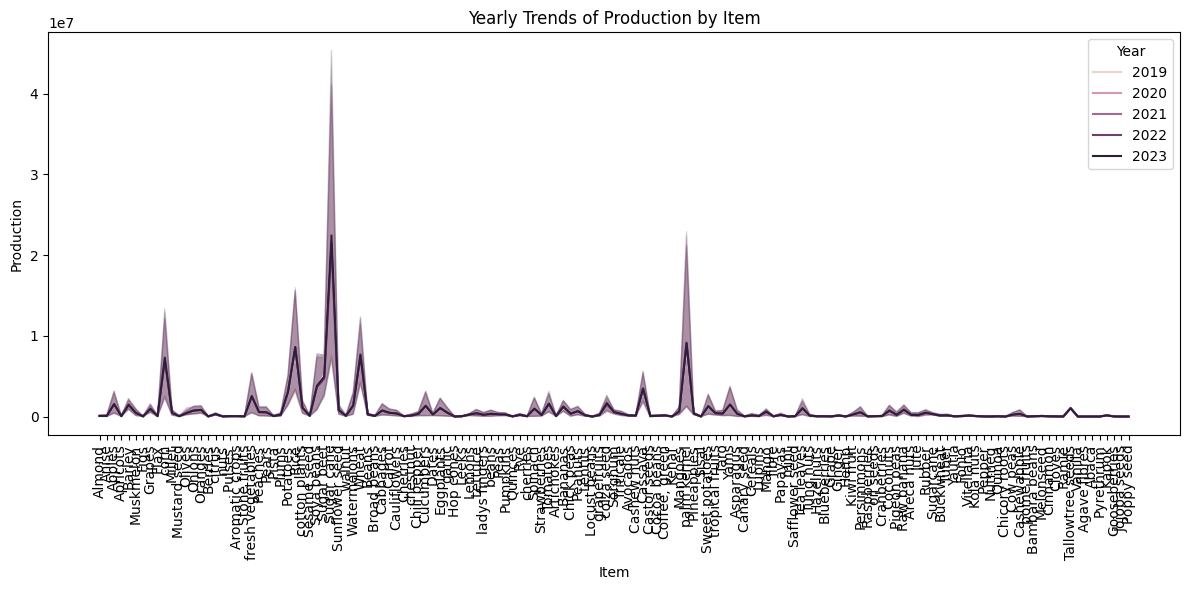

In [79]:
# Yearly Trends: Analyze the Year column to detect trends in Area harvested, Yield, and Production over time.
# Growth Analysis: Investigate if certain crops or regions show increasing or decreasing trends in yield or production

# List of metrics to analyze
metrics = ['Area harvested', 'Yield', 'Production']

# Create line plots for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Item', y=metric, hue='Year')
    plt.title(f"Yearly Trends of {metric} by Item")
    plt.xlabel("Item")
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()


Element,Year,Area harvested,Yield,Production
Element,,,,
Year,1.000000,0.001528,0.002928,0.001460
Area harvested,0.001528,1.000000,-0.027517,0.640829
Yield,0.002928,-0.027517,1.000000,0.052182
Production,0.001460,0.640829,0.052182,1.000000


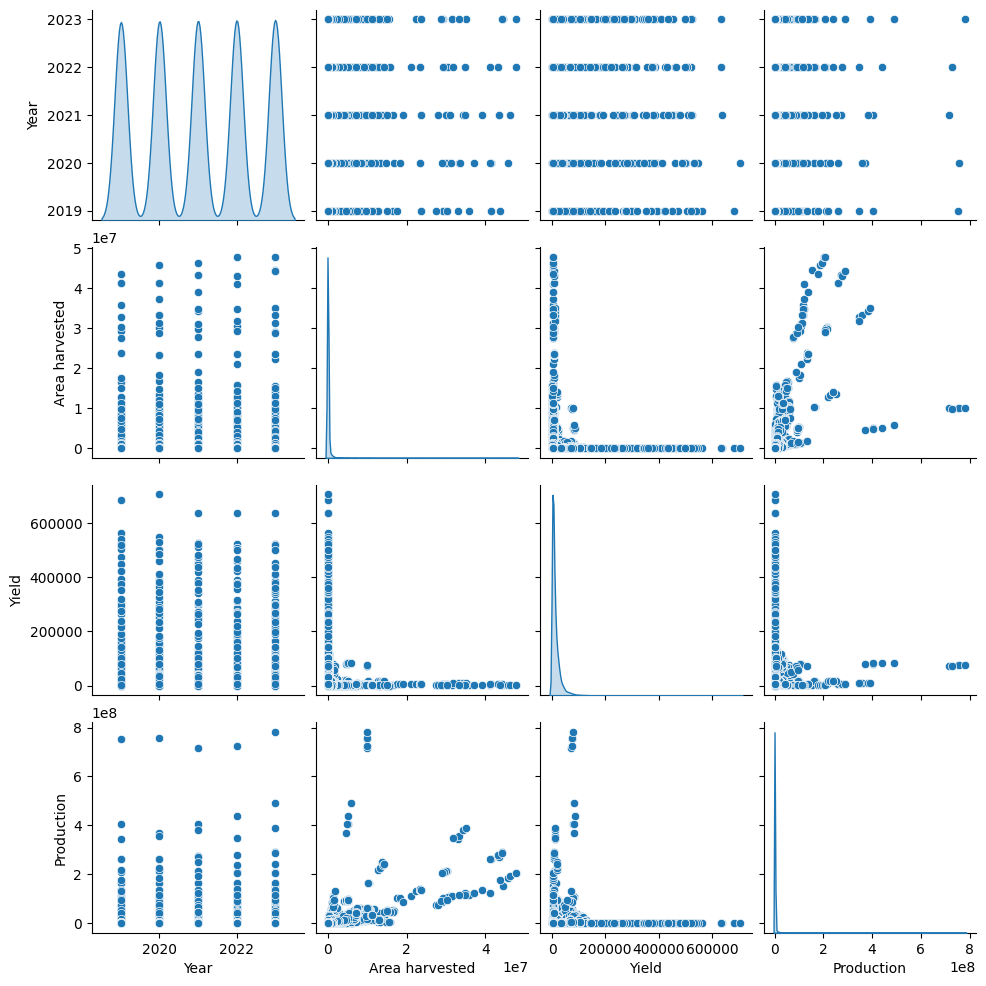

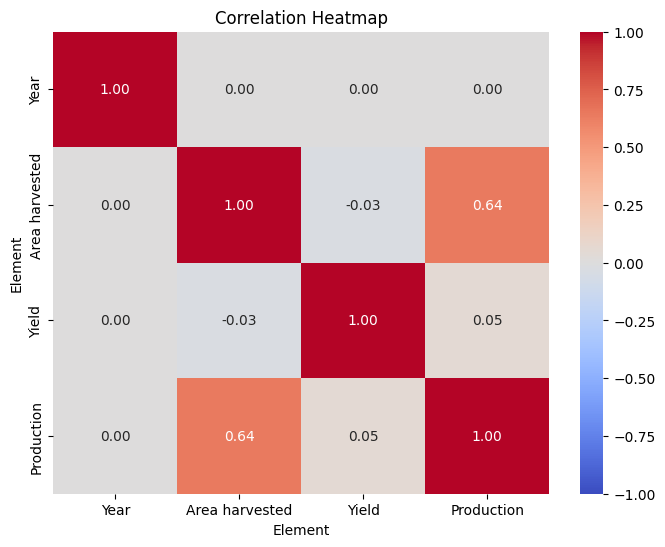

In [82]:
# Study correlations between Area harvested, Yield, and Production to understand the relationship between land usage and productivity.
sns.pairplot(df,vars=['Year','Area harvested','Yield','Production'],diag_kind='kde')


# Correlation matrix for numerical columns
correlation_matrix = df[['Year','Area harvested','Yield','Production']].corr()
display(correlation_matrix)
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# For most features, the scatter plots show no clear linear or strong non-linear relationships, indicating weak or no correlation.
# There appears to be a positive trend between Area harvested and Production. As the area harvested increases, production also tends to increase, suggesting a moderate positive relationship.

In [93]:
# Across Crops: Compare yields (Yield) of different crops (Item) to identify high-yield vs. low-yield crops
High_low_yield_crops = df.groupby('Item')['Yield'].max().sort_values(ascending=False)

display('high-yield Crops:',High_low_yield_crops.head())
display('low-yield crops:',High_low_yield_crops.tail())


'high-yield Crops:'

Item
Cucumbers      705196.7
Eggplants      529000.0
Tomatoes       505555.6
Watermelons    421797.6
Papayas        343671.0
Name: Yield, dtype: float64

'low-yield crops:'

Item
Bambara beans    1205.8
Vanilla           777.3
Kola nuts         775.2
Pyrethrum         637.8
Jojoba seeds      479.0
Name: Yield, dtype: float64

In [91]:
# Across Regions: Compare production (Production) across different areas (Area) to find highly productive regions.
highly_productive_regions = df.groupby('Area')['Production'].sum().sort_values(ascending=False)
# Top productive regions
display('Top productive regions:',highly_productive_regions.head(10))

'Top productive regions:'

Area
China        9.112912e+09
Mainland     9.073768e+09
India        5.964296e+09
Brazil       5.496740e+09
America      3.511081e+09
Indonesia    2.115662e+09
Russian      1.208515e+09
Nigeria      1.082527e+09
Thailand     9.950231e+08
Argentina    8.240211e+08
Name: Production, dtype: float64

In [96]:
df['Item'].unique()

array(['Almond', 'Anise', 'Apples', 'Apricots', 'Barley', 'Muskmelon',
       'Figs', 'Grapes', 'Flax', 'corn', 'Millet', 'Mustard seed',
       'Olives', 'Onions', 'Oranges', 'Berries', 'citrus', 'nuts',
       'Pulses ', 'Aromatic crops', 'Stone fruits', 'fresh vegetables',
       'Peaches', 'Pears', 'Pista', 'Plums', 'Potatoes', 'Rice',
       'cotton plants', 'Sesame seed', 'Soya beans', 'Sugar beet',
       'Sugar cane', 'Sunflower seed', 'walnut', 'Watermelons', 'Wheat',
       'Beans', 'Broad beans', 'Cabbages', 'Carrot', 'Cauliflowers',
       'Cherries', 'chestnut', 'Chili pepper', 'Cucumbers', 'Dates',
       'Eggplants', 'garlic', 'Hop cones', 'Leeks', 'Lemons', 'Lettuce',
       'ladys fingers', 'beans', 'Peas', 'Pumpkins', 'Quinces', 'Rye',
       'cherries', 'Spinach', 'Strawberries', 'Tomatoes', 'Artichokes',
       'Bananas', 'Chick peas', 'Peanuts', 'Lentils', 'Locust beans',
       'grapefruits', 'colza seed', 'Sorghum', 'Triticale', 'Avocados',
       'Cashew nuts', 

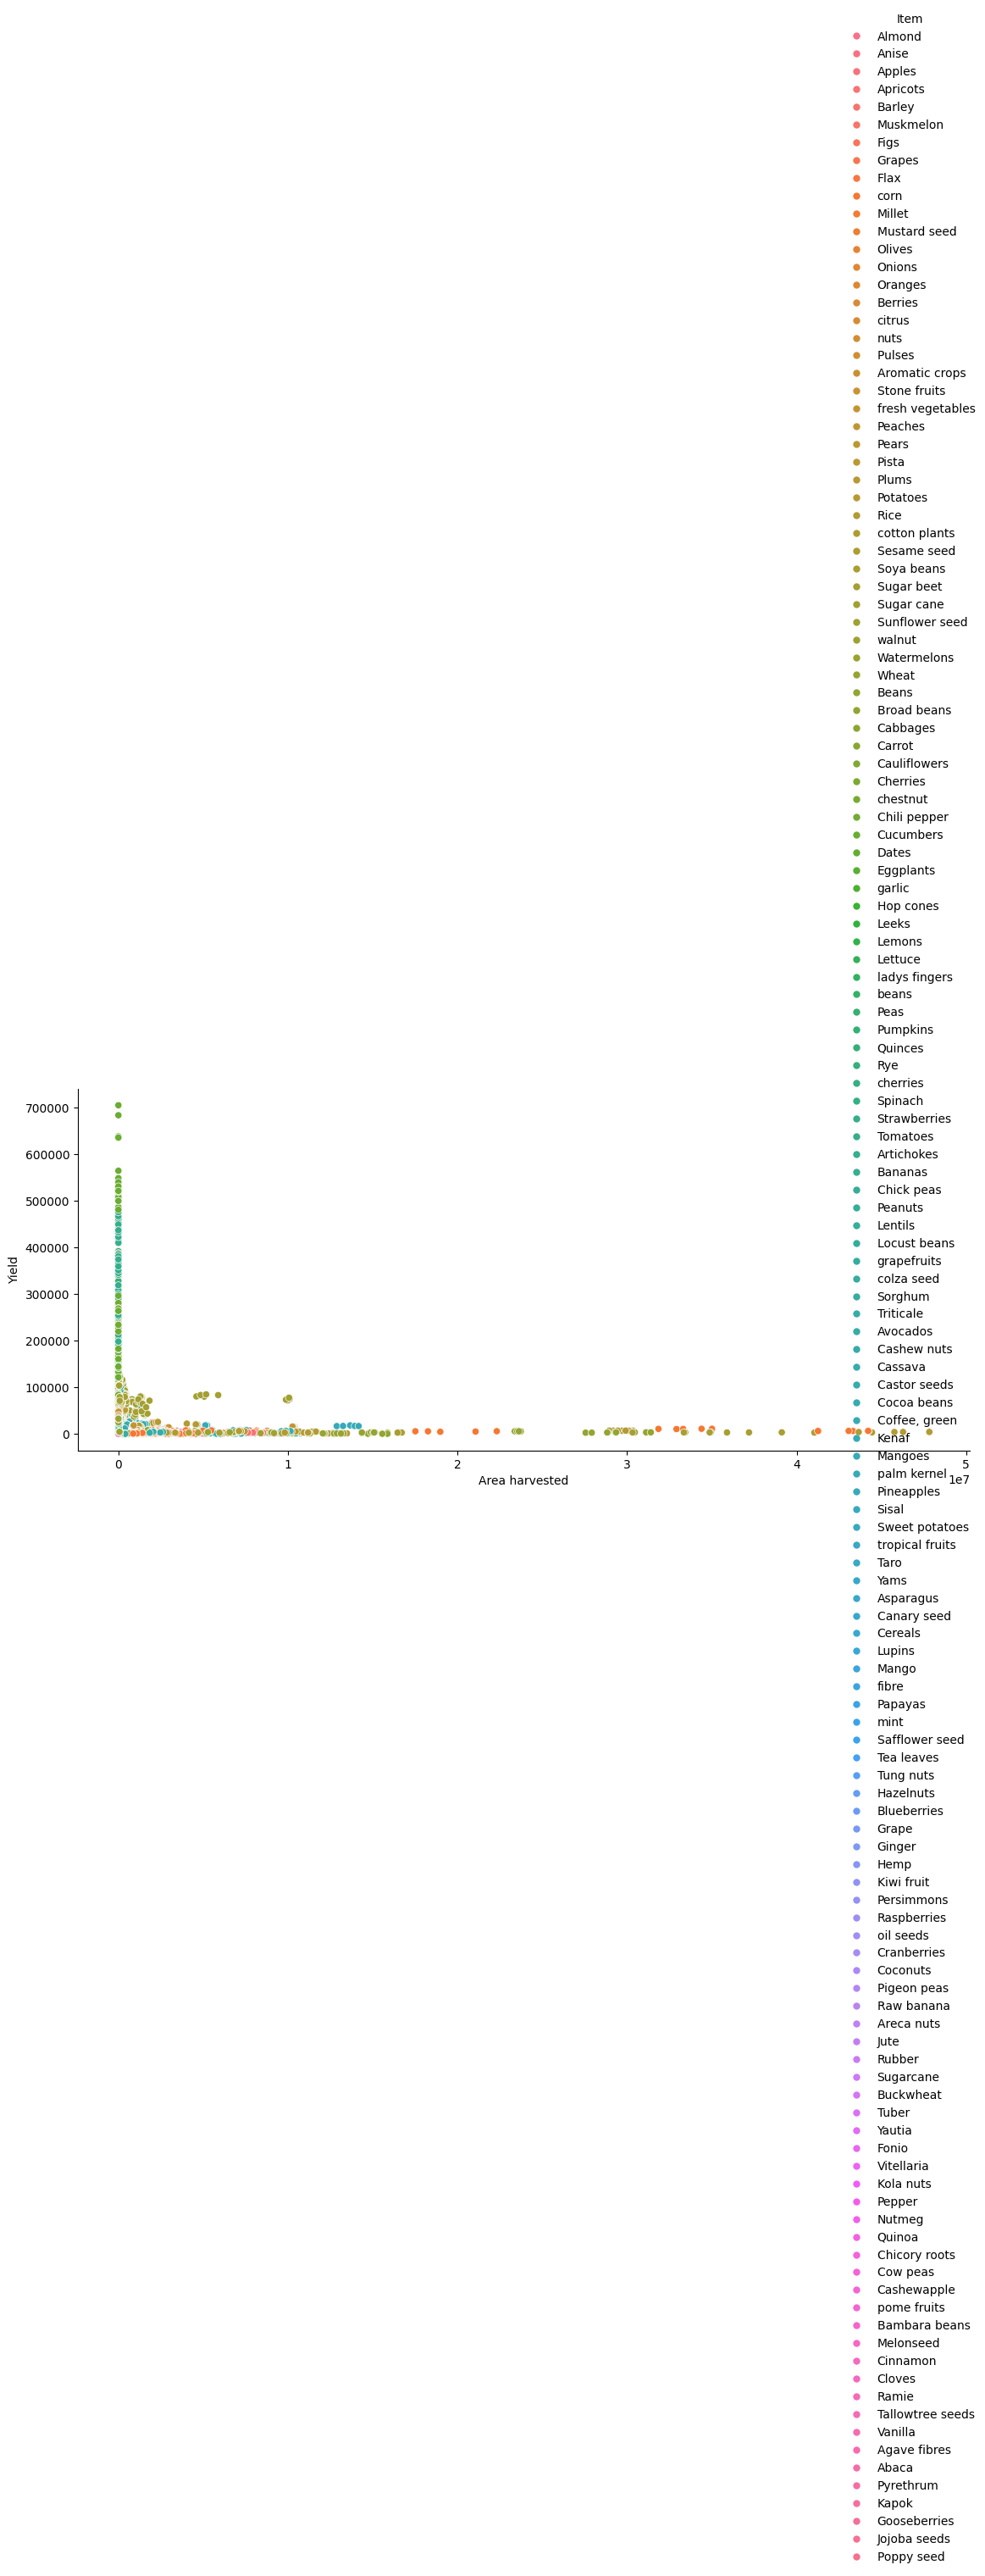

In [95]:
# Examine variations in Yield to identify efficient crops and regions.

# Examine variations in Yield to identify efficient crops and regions.
sns.relplot(data=df[df['Item'].isin(['Cucumbers',''])],x='Area harvested',y='Yield',hue='Item',aspect=2)
plt.tight_layout()
plt.show()

In [97]:
# Calculate productivity ratios: Production/Area harvested to cross-verify yields.
df_ratio = df.copy()
df_ratio['productivity_ratios'] = df_ratio['Production']/df_ratio['Area harvested']
display(df_ratio[['Area','Item','Area harvested','Yield','Production','productivity_ratios']].sort_values(by='productivity_ratios',ascending=False).head(30))

Element,Area,Item,Area harvested,Yield,Production,productivity_ratios
27382,Netherlands,Cucumbers,610.0,705196.7,430170.00,705.196721
27381,Netherlands,Cucumbers,600.0,683750.0,410250.00,683.750000
18081,Iceland,Cucumbers,3.0,564617.9,1924.00,641.333333
27383,Netherlands,Cucumbers,690.0,638318.8,440440.00,638.318841
27385,Netherlands,Cucumbers,670.0,635925.4,426070.00,635.925373
27384,Netherlands,Cucumbers,630.0,635127.0,400130.00,635.126984
18082,Iceland,Cucumbers,3.0,548738.8,1808.00,602.666667
29071,Oman,Cucumbers,137.0,540021.9,73983.00,540.021898
40751,United Kingdom,Cucumbers,110.0,531000.0,58410.00,531.000000
3429,Belgium,Eggplants,20.0,529000.0,10580.00,529.000000


In [135]:
ml_df = df[['Area','Item Category','Item','Area harvested','Production']].copy()
ml_df.head()

Element,Area,Item Category,Item,Area harvested,Production
0,Afghanistan,Nuts,Almond,29203.0,38205.0
1,Afghanistan,Nuts,Almond,22134.0,39307.0
2,Afghanistan,Nuts,Almond,36862.0,64256.0
3,Afghanistan,Nuts,Almond,36462.0,63515.0
4,Afghanistan,Nuts,Almond,37000.0,67000.0


In [136]:
from sklearn.preprocessing import OneHotEncoder
import umap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode Nominal Features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(ml_df[['Area', 'Item Category', 'Item']])

# Get the encoded column names (optional, useful for debugging)
encoded_columns = encoder.get_feature_names_out(['Area', 'Item Category', 'Item'])

# Apply UMAP for Dimensionality Reduction
reducer = umap.UMAP(n_components=3, random_state=42)
reduced_features = reducer.fit_transform(encoded_features)

# Convert reduced features to DataFrame
reduced_features_df = pd.DataFrame(reduced_features, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Combine UMAP-reduced features and 'Area harvested'
x = pd.concat([reduced_features_df, np.log1p(ml_df['Area harvested'])], axis=1)

# Apply log transformation to the target
y = np.log1p(ml_df['Production'])

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predictions on Test Data
predictions_scaled = model.predict(X_test)

# Step 7: Revert Predictions Back to Original Scale
predictions = np.expm1(predictions_scaled)

# Step 8: Metrics Calculation (use original scale predictions for evaluation)
mae = mean_absolute_error(np.expm1(y_test), predictions)  # Convert y_test back to original scale
mse = mean_squared_error(np.expm1(y_test), predictions)  # Convert y_test back to original scale
r2 = r2_score(np.expm1(y_test), predictions)  # Convert y_test back to original scale

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print("Predictions on Test Data:", predictions)



d:\0.0Apps\python\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\0.0Apps\python\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Mean Absolute Error: 874075.4245221937
Mean Squared Error: 52127362652952.77
R2 Score: 0.5367523458521716
Predictions on Test Data: [3.44926107e+06 3.01682549e+03 1.79518098e+04 ... 6.57784130e+01
 3.74335803e+03 5.64316146e+02]


In [ ]:
# Example new data
new_data = {
    'Area': ['Afghanistan'],
    'Item Category': ['Nuts'],
    'Item': ['Almond'],
    'Area harvested': [35000]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Encode categorical features
encoded_new = encoder.transform(new_df[['Area', 'Item Category', 'Item']])
reduced_new = reducer.transform(encoded_new)

# Combine reduced features and transformed numerical feature
final_input = pd.concat([pd.DataFrame(reduced_new, columns=['UMAP1', 'UMAP2', 'UMAP3']),
                         pd.DataFrame(np.log1p(new_df['Area harvested']), columns=['Area harvested'])], axis=1)

# Predict production (log-transformed)
log_predicted_production = model.predict(final_input)

# Convert back to the original scale
predicted_production = np.expm1(log_predicted_production)
print(f"Predicted Production: {predicted_production[0]}")


In [124]:
df.head()

Element,Domain,Area,Item,Year,Area harvested,Area_unit,Yield,Yield_unit,Production,Production_unit,Item Category
0,Crops and livestock products,Afghanistan,Almond,2019,29203.0,Ha,1308.3,kg,38205.0,Ton,Nuts
1,Crops and livestock products,Afghanistan,Almond,2020,22134.0,Ha,1775.9,kg,39307.0,Ton,Nuts
2,Crops and livestock products,Afghanistan,Almond,2021,36862.0,Ha,1743.2,kg,64256.0,Ton,Nuts
3,Crops and livestock products,Afghanistan,Almond,2022,36462.0,Ha,1742.0,kg,63515.0,Ton,Nuts
4,Crops and livestock products,Afghanistan,Almond,2023,37000.0,Ha,1810.8,kg,67000.0,Ton,Nuts
